# Importing the Dependencies

In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from xgboost.sklearn import XGBRegressor

import shap
import lime
from lime import lime_tabular
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

In [3]:
# !npm install -g --unsafe-perm ijavascript zeromq
# !ijsinstall --install=global
# !jupyter-kernelspec list

In [4]:
calories=pd.read_csv(r'C:\Users\Admin\Desktop\Major\calories.csv')
exercise=pd.read_csv(r'C:\Users\Admin\Desktop\Major\exercise.csv')

In [5]:
calories.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [6]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68     190      94        29         105       40.8
1  14861698  female   20     166      60        14          94       40.3
2  11179863    male   69     179      79         5          88       38.7
3  16180408  female   34     179      71        13         100       40.5
4  17771927  female   27     154      58        10          81       39.8

In [7]:
calories_data=pd.concat([exercise,calories.Calories],axis=1)
calories_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68     190      94        29         105       40.8   
1  14861698  female   20     166      60        14          94       40.3   
2  11179863    male   69     179      79         5          88       38.7   
3  16180408  female   34     179      71        13         100       40.5   
4  17771927  female   27     154      58        10          81       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [8]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [9]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
calories_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68     190      94        29         105       40.8   
1  14861698       1   20     166      60        14          94       40.3   
2  11179863       0   69     179      79         5          88       38.7   
3  16180408       1   34     179      71        13         100       40.5   
4  17771927       1   27     154      58        10          81       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [11]:
calories_data.describe()

User_ID        Gender           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07      0.503533     42.789800    174.465133     74.966867   
std    2.872851e+06      0.500004     16.980264     14.258114     15.035657   
min    1.000116e+07      0.000000     20.000000    123.000000     36.000000   
25%    1.247419e+07      0.000000     28.000000    164.000000     63.000000   
50%    1.499728e+07      1.000000     39.000000    175.000000     74.000000   
75%    1.744928e+07      1.000000     56.000000    185.000000     87.000000   
max    1.999965e+07      1.000000     79.000000    222.000000    132.000000   

           Duration    Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  15000.000000  
mean      15.530600     95.518533     40.025453     89.539533  
std        8.319203      9.583328      0.779230     62.456978  
min        1.000000     67.000000     37.100000      1.000000  
25%        8.000000     88.000000     39.600000     35.000000  
50%       16.000000     96.000000     40.200000     79.000000  
75%       23.000000    103.000000     40.600000    138.000000  
max       30.000000    128.000000     41.500000    314.000000

In [12]:
sns.set()

<Axes: ylabel='count'>

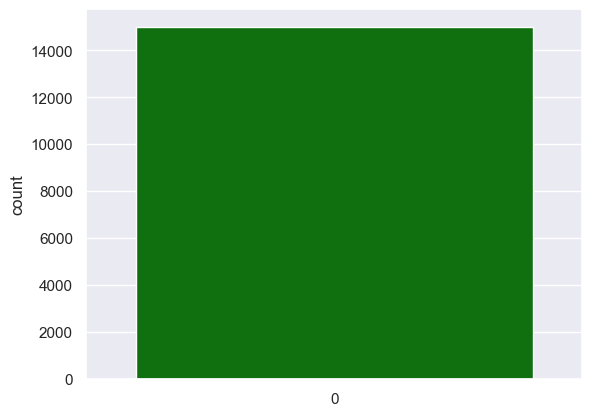

In [13]:
# # plotting the gender column in count plot
sns.countplot(calories_data['Gender'],color='Green')



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Age', ylabel='Density'>

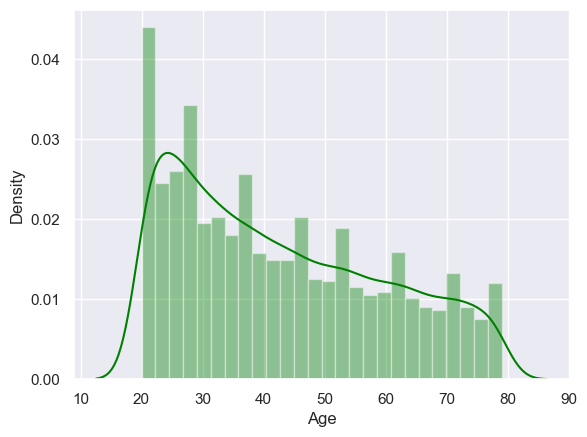

In [14]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'], color='Green')



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Height', ylabel='Density'>

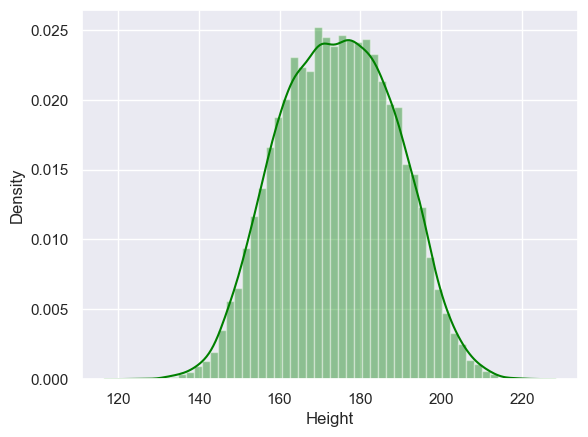

In [15]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'], color='Green')



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Weight', ylabel='Density'>

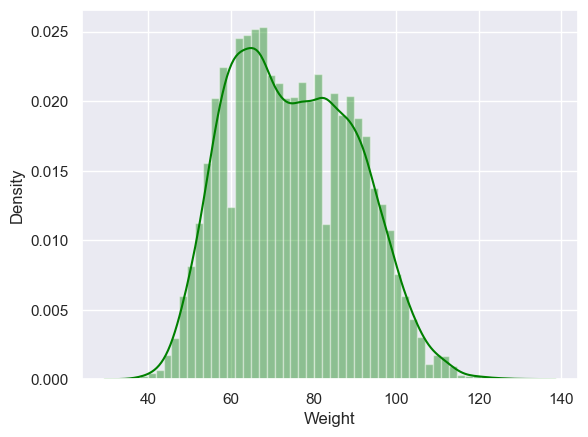

In [16]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'], color='Green')



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Heart_Rate', ylabel='Density'>

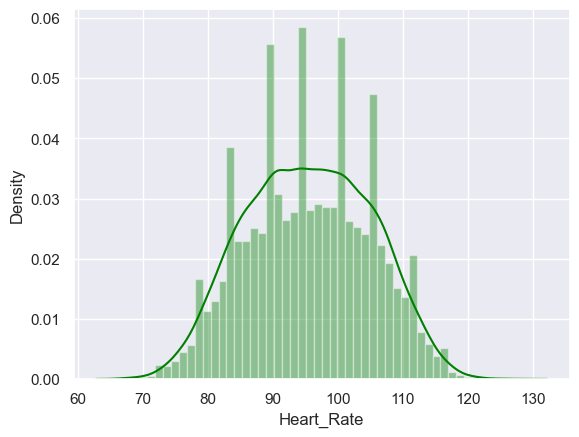

In [17]:
# finding the distribution of "Heart Rate" column
sns.distplot(calories_data['Heart_Rate'], color='Green')



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Body_Temp', ylabel='Density'>

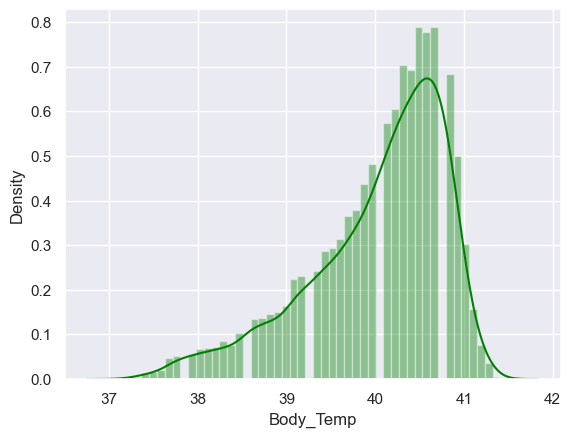

In [18]:
# finding the distribution of "Body Temperature" column
sns.distplot(calories_data['Body_Temp'], color='Green')



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Duration', ylabel='Density'>

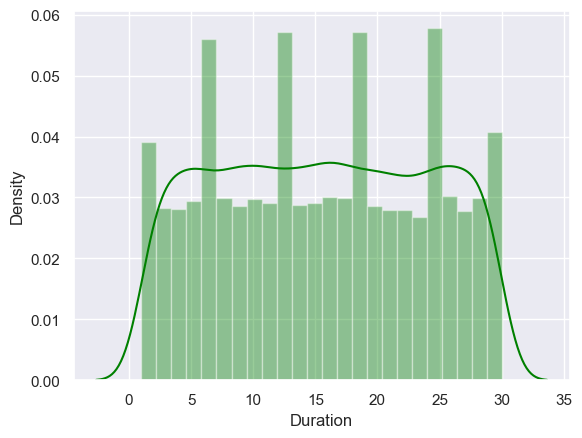

In [19]:
# finding the distribution of "Duration" column
sns.distplot(calories_data['Duration'], color='Green')

Finding the Correlation in the dataset

1.   Positive Correlation
2.   Negative Correlation


In [20]:
correlation = calories_data.corr()

<Axes: >

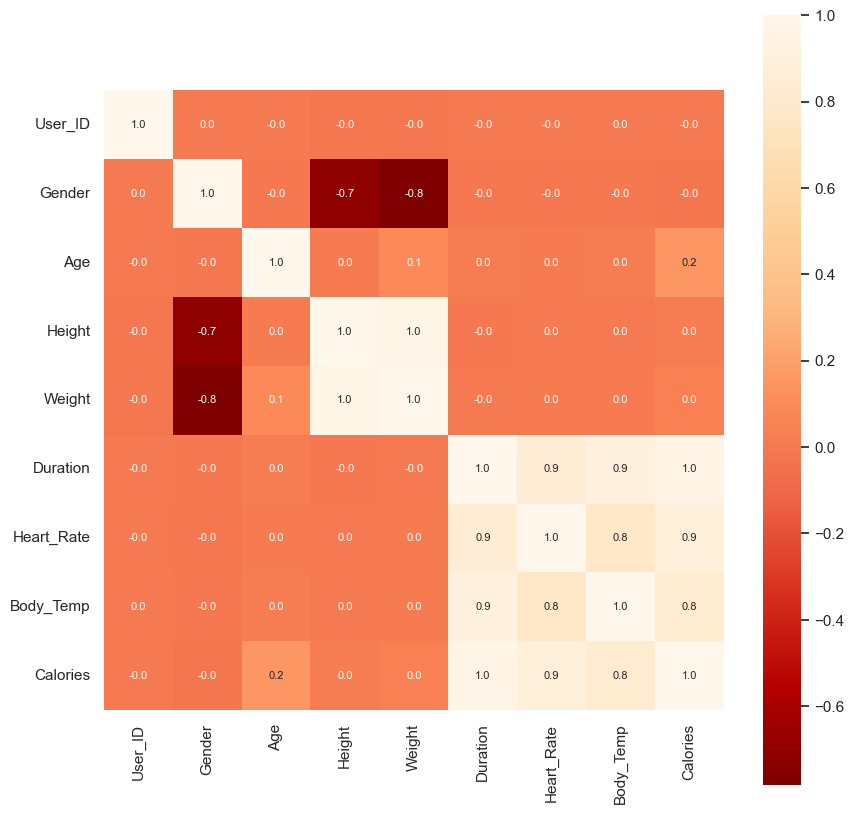

In [21]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='OrRd_r')

Seperating Features and Target

In [22]:

X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
y = calories_data['Calories']

In [23]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [24]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the Data into training and Test data

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape,X_test.shape

((12000, 7), (3000, 7))

In [92]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [93]:
pred_xgb=xgb.predict(X_test)
pred_xgb

array([172.21268 , 192.5936  ,  51.877926, ..., 119.1775  ,  19.32563 ,
       217.1421  ], dtype=float32)

In [94]:
mae_xgb=metrics.mean_absolute_error(y_test,pred_xgb)
mae_xgb

1.5139621509313583

In [95]:
rmse_xgb = math.sqrt(metrics.mean_squared_error(y_test,pred_xgb))
rmse_xgb

2.233508627935593

In [96]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
pred_lr=lr.predict(X_test)
print(pred_lr)


[170.67646027 192.08857813  56.14796403 ... 129.66570069   2.4152784
 191.99081681]


In [98]:
mae_lr=metrics.mean_absolute_error(y_test,pred_lr)
print(mae_lr)

8.44151355384972


In [99]:
rmse_lr = math.sqrt(metrics.mean_squared_error(y_test,pred_lr))
rmse_lr

11.488940149152876

In [100]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [101]:
pred_dt=dt.predict(X_test)
print(pred_dt)

[166. 187.  52. ... 123.  20. 207.]


In [102]:
mae_dt=metrics.mean_absolute_error(y_test,pred_dt)
mae_dt

3.445

In [103]:
rmse_dt = math.sqrt(metrics.mean_squared_error(y_test,pred_dt))
rmse_dt

5.365662431921462

In [104]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [105]:
pred_rf=rf.predict(X_test)
print(pred_rf)

[170.08 192.05  52.99 ... 120.36  19.66 213.35]


In [106]:
mae_rf=metrics.mean_absolute_error(y_test,pred_rf)
mae_rf

1.697463333333333

In [107]:
rmse_rf = math.sqrt(metrics.mean_squared_error(y_test,pred_rf))
rmse_rf

2.6864251525028573

In [41]:
explainer = shap.Explainer(xgb.predict, X_test)
shap_values = explainer(X_test)

Exact explainer: 3001it [01:46, 28.11it/s]                          


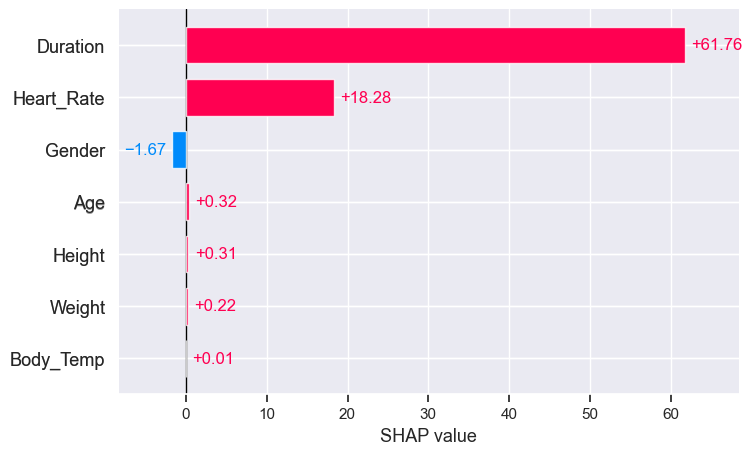

In [42]:
shap.plots.bar(shap_values[0])

In [43]:
explainer = shap.Explainer(rf.predict, X_test)
shap_values = explainer(X_test)

Exact explainer: 3001it [16:35,  2.98it/s]                          


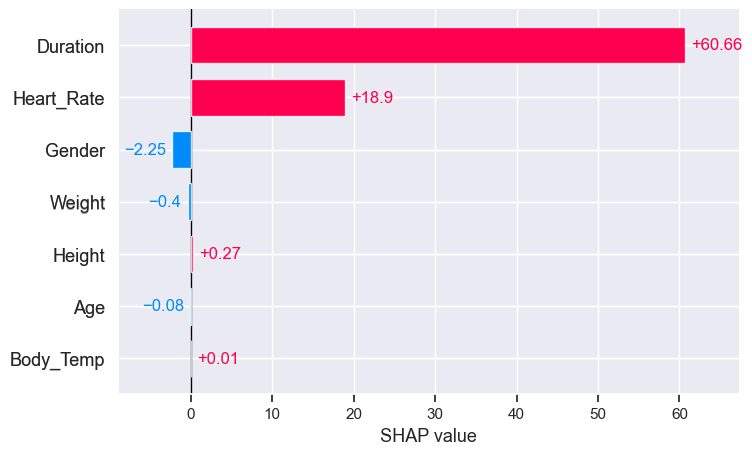

In [44]:
shap.plots.bar(shap_values[0])

In [40]:

# shap.initjs()
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_train)
# i = 4776
# shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[4776], feature_names=X_train.columns)

In [46]:
explain = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['low', 'high'],
    mode='regression'
)

In [47]:

exp = explain.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=xgb.predict
)

exp.show_in_notebook(show_table=True)

In [49]:

exp = explain.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=rf.predict
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [50]:
intake= pd.read_csv(r'C:\Users\Admin\Desktop\Major\intake.csv')
intake.head()

User_ID     Intake
0  14733363  2788.1868
1  14861698  2501.0414
2  11179863  2070.7236
3  16180408  2599.0380
4  17771927  2156.7492

In [51]:
intake_data=pd.concat([exercise,intake['Intake']],axis=1)
intake_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68     190      94        29         105       40.8   
1  14861698  female   20     166      60        14          94       40.3   
2  11179863    male   69     179      79         5          88       38.7   
3  16180408  female   34     179      71        13         100       40.5   
4  17771927  female   27     154      58        10          81       39.8   

      Intake  
0  2788.1868  
1  2501.0414  
2  2070.7236  
3  2599.0380  
4  2156.7492

In [52]:
intake_correlation=intake_data.corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

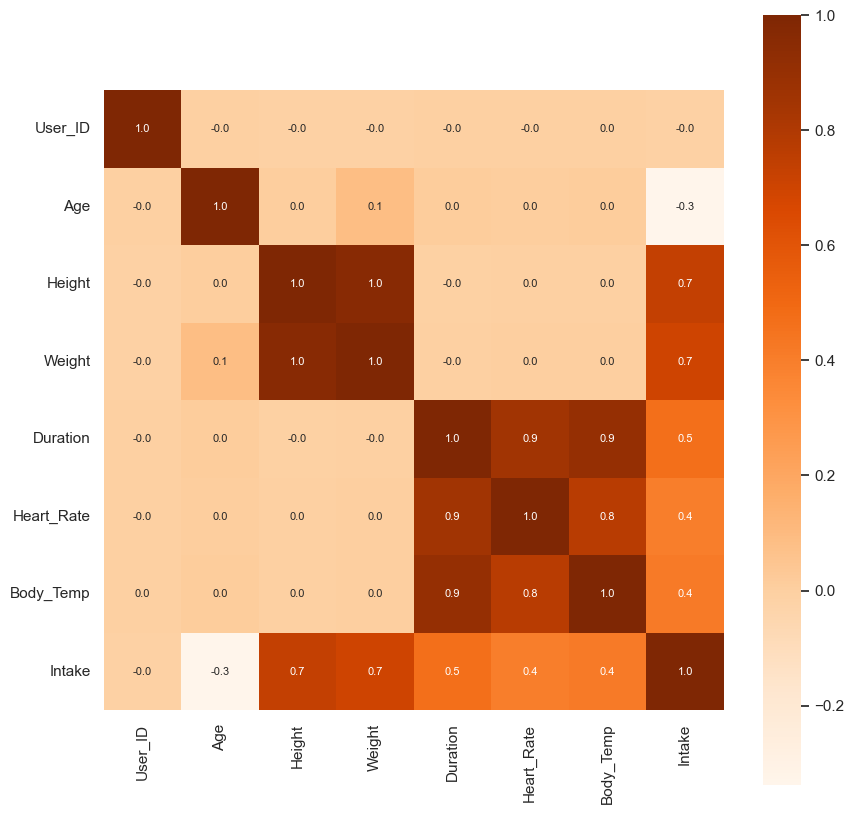

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(intake_correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Oranges')

In [54]:
intake_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [55]:
iX = intake_data.drop(columns=['User_ID','Intake'], axis=1)
iY = intake_data['Intake']

In [56]:

iX_train, iX_test, iY_train, iY_test = train_test_split(iX, iY, test_size=0.2, random_state=42)

In [120]:
ixgb=XGBRegressor()
ixgb.fit(iX_train,iY_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [121]:
in_pred_xgb=ixgb.predict(iX_test)
in_pred_xgb

array([2266.356 , 3003.484 , 2275.238 , ..., 2618.1943, 2185.6372,
       2797.081 ], dtype=float32)

In [60]:
in_mae_xgb=metrics.mean_absolute_error(iY_test,in_pred_xgb)
in_mae_xgb

11.638010619075521

In [80]:
in_rmse_xgb = math.sqrt(metrics.mean_squared_error(iY_test,in_pred_xgb))
in_rmse_xgb

16.173279701434794

In [61]:
lr.fit(iX_train,iY_train)

LinearRegression()

In [62]:
in_pred_lr=lr.predict(iX_test)
in_pred_lr

array([2262.95627588, 3068.52640211, 2170.3399096 , ..., 2524.8975996 ,
       2115.90827801, 2884.39944163])

In [81]:
in_rmse_lr = math.sqrt(metrics.mean_squared_error(iY_test,in_pred_lr))
in_rmse_lr

66.2572364779972

In [63]:
in_mae_lr=metrics.mean_absolute_error(iY_test,in_pred_lr)
in_mae_lr

53.565216582671354

In [124]:
irf=RandomForestRegressor()
irf.fit(iX_train,iY_train)

RandomForestRegressor()

In [126]:
in_pred_rf=irf.predict(iX_test)
in_pred_rf

array([2283.015112, 2988.28719 , 2259.231494, ..., 2622.719638,
       2201.604084, 2829.274812])

In [127]:
in_mae_rf=metrics.mean_absolute_error(iY_test,in_pred_rf)
in_mae_rf

10.043551279333364

In [82]:
in_rmse_rf = math.sqrt(metrics.mean_squared_error(iY_test,in_pred_rf))
in_rmse_rf

18.43529284801478

In [67]:
dt.fit(iX_train,iY_train)

DecisionTreeRegressor()

In [68]:
in_pred_dt=dt.predict(iX_test)
in_pred_dt

array([2257.3418, 3043.817 , 2256.1643, ..., 2660.9226, 2202.1836,
       2840.3984])

In [83]:
in_rmse_dt = math.sqrt(metrics.mean_squared_error(iY_test,in_pred_dt))
in_rmse_dt

33.85597016489588

In [84]:
in_mae_dt=metrics.mean_absolute_error(iY_test,in_pred_dt)
in_mae_dt

22.6832768

# Intake 

In [70]:
explainer = shap.Explainer(xgb.predict, iX_test)
ishap_values = explainer(iX_test)

Exact explainer: 3001it [00:59, 39.88it/s]                          


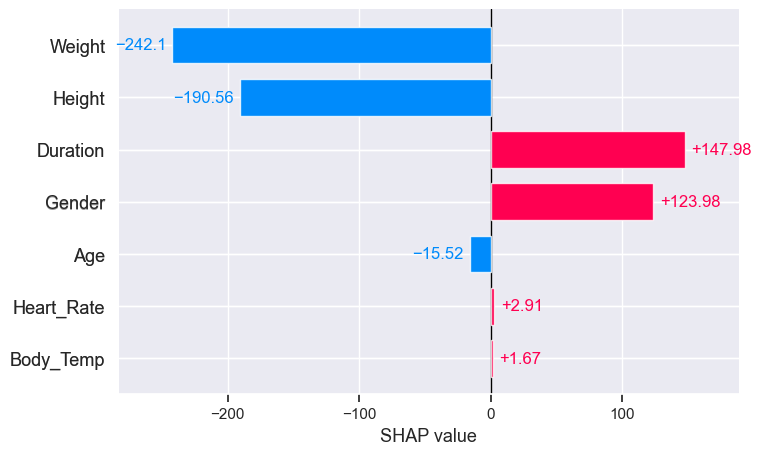

In [71]:
shap.plots.bar(ishap_values[0])

In [72]:
explainer = shap.Explainer(rf.predict, iX_test)
ishap_values = explainer(iX_test)

Exact explainer: 3001it [10:53,  4.51it/s]                          


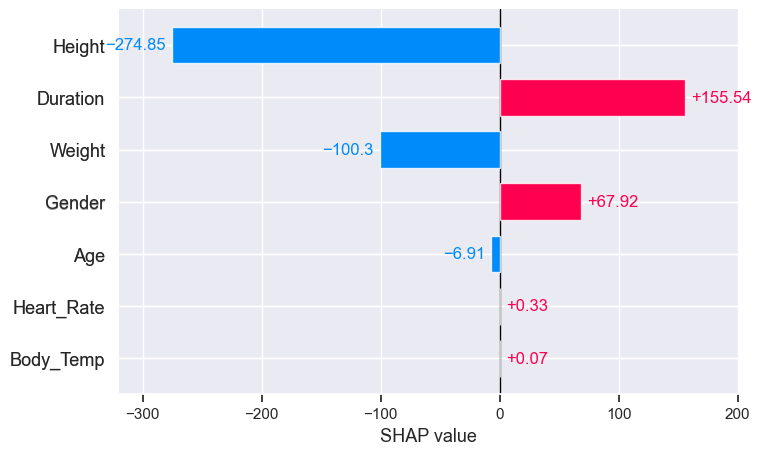

In [73]:
shap.plots.bar(ishap_values[0])

In [62]:
# shap.initjs()
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(iX_train)
# i = 4776
# # shap.force_plot(explainer.expected_value, shap_values[i], features=iX_train.loc[4776], feature_names=iX_train.columns)

In [74]:
explain = lime_tabular.LimeTabularExplainer(
    training_data=np.array(iX_train),
    feature_names=iX_train.columns,
    mode='regression'
)

In [75]:

exp = explain.explain_instance(
    data_row=iX_test.iloc[1], 
    predict_fn=xgb.predict
)

exp.show_in_notebook(show_table=True)

In [76]:

exp = explain.explain_instance(
    data_row=iX_test.iloc[1], 
    predict_fn=rf.predict
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [110]:
import pickle

In [115]:
!pip show xgboost --version

Name: xgboost
Version: 1.7.5
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: c:\users\admin\anaconda3\lib\site-packages
Requires: numpy, scipy
Required-by: 


In [134]:
pickle.dump(rf,open('btrained_model.pkl','wb'))
pickle.dump(irf,open('itrained_model.pkl','wb'))
loaded_model1 = pickle.load(open('btrained_model.pkl','rb'))
loaded_model2 = pickle.load(open('itrained_model.pkl','rb'))

In [137]:
user_input = (0,27,176,76,25,120,40)


# Transforming user input data into a numpy array
user_input_array = np.asarray(user_input)

# We need to reshape the array so that we can use it in our model
user_input_reshaped = user_input_array.reshape(1,-1)

# Calculating prediction based on user input
final=[]
burnt_user_input_prediction = loaded_model1.predict(user_input_reshaped)
intakeuser_input_prediction = loaded_model2.predict(user_input_reshaped)

final.append(intakeuser_input_prediction)
final.appendend(burnt_user_input_prediction)

final

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


[array([2616.23131]), array([201.6])]